In [1]:
import jupyter_utils as j

j.reload(j)

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score, recall_score, precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import fbeta_score, recall_score

from matplotlib import pyplot as plt

import matplotlib

matplotlib.style.use('ggplot')

j.apply_options(pd)
j.reload(j)

%matplotlib inline

In [3]:
data = pd.read_csv('sparkify_data_final.csv') 

pd.set_option('use_inf_as_na', True)
data = data.dropna()
data = data.drop(list(filter(lambda c: len(c) == 2, data.columns)), axis = 1)

data.head(10)

,canceled,male,paid,avg_daily_actions,avg_session_duration,n_actions,n_added_to_playlist,n_ads,n_days,n_dislikes,n_downgrades,n_errors,n_friends,n_help,n_home,n_likes,n_sess,n_settings,n_songs,n_upgrades,session_avg_actions,session_avg_added_playlist,session_avg_ads,session_avg_dislikes,session_avg_errors,session_avg_friends,session_avg_help,session_avg_home,session_avg_likes,session_avg_playback,session_avg_settings,session_avg_songs,session_avg_time_away,time_window
0,1,0,0,68.500000,3.507733,137,1,22,2,3,0,0,3,0,3,4,2,0,96,0,19.536542,0.142602,3.137255,0.427807,0.000000,0.427807,0.000000,0.427807,0.570410,1.024795,0.000000,13.689840,66.022500,73.035000
1,1,1,0,65.833333,5.758219,395,6,11,6,5,0,0,2,1,23,15,5,2,310,1,18.018703,0.273702,0.501787,0.228085,0.000000,0.091234,0.045617,1.049190,0.684255,0.997185,0.091234,14.141261,166.991528,689.887778
2,1,0,1,30.400000,2.761294,152,3,9,5,0,0,0,2,2,7,8,5,1,112,1,18.797018,0.370994,1.112981,0.000000,0.000000,0.247329,0.247329,0.865652,0.989317,0.972627,0.123665,13.850435,47.248056,197.078611
3,0,1,0,28.000000,2.938208,84,2,6,3,1,0,0,3,2,2,3,3,3,62,0,19.768582,0.470681,1.412042,0.235340,0.000000,0.706021,0.470681,0.470681,0.706021,1.033783,0.706021,14.591096,522.412639,1049.074444
4,1,0,1,107.800000,14.717388,2156,45,1,20,15,0,0,26,10,70,102,17,15,1826,0,17.074185,0.356372,0.007919,0.118791,0.000000,0.205904,0.079194,0.554357,0.807777,1.067369,0.118791,14.460789,53.600208,983.875833
5,1,1,1,54.666667,7.115083,328,8,1,6,1,0,2,3,0,17,16,5,2,266,0,17.916698,0.436993,0.054624,0.054624,0.109248,0.163872,0.000000,0.928609,0.873985,1.013841,0.109248,14.530005,87.977986,370.218889
6,0,1,0,40.000000,3.818930,600,6,35,15,4,0,0,16,3,36,12,15,5,462,0,18.872046,0.188720,1.100869,0.125814,0.000000,0.503255,0.094360,1.132323,0.377441,1.013385,0.157267,14.531475,95.152480,1363.927778
7,1,1,0,25.833333,1.925077,155,4,9,6,3,0,0,2,0,6,5,7,1,122,0,19.535079,0.504131,1.134295,0.378098,0.000000,0.252066,0.000000,0.756197,0.630164,1.054349,0.126033,15.375998,60.725833,372.289444
8,0,1,0,18.625000,1.202651,149,0,13,8,0,0,0,6,0,6,6,8,3,112,0,20.467033,0.000000,1.785714,0.000000,0.000000,0.824176,0.000000,0.824176,0.824176,1.069652,0.412088,15.384615,201.516190,1417.893333
9,0,0,1,138.222222,21.700945,1244,25,0,9,10,0,1,21,11,43,50,5,3,1048,0,17.075793,0.343163,0.000000,0.137265,0.013727,0.288257,0.150992,0.590240,0.686326,1.005280,0.041180,14.385395,269.713125,1151.704167


In [4]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

_x = data.copy()
_x[features_to_normalize] = Normalizer().fit_transform(_x[features_to_normalize]) 

_x.head(10)

,canceled,male,paid,avg_daily_actions,avg_session_duration,n_actions,n_added_to_playlist,n_ads,n_days,n_dislikes,n_downgrades,n_errors,n_friends,n_help,n_home,n_likes,n_sess,n_settings,n_songs,n_upgrades,session_avg_actions,session_avg_added_playlist,session_avg_ads,session_avg_dislikes,session_avg_errors,session_avg_friends,session_avg_help,session_avg_home,session_avg_likes,session_avg_playback,session_avg_settings,session_avg_songs,session_avg_time_away,time_window
0,1,0,0,0.328434,0.016818,0.656868,0.004795,0.105483,0.009589,0.014384,0.0,0.000000,0.014384,0.000000,0.014384,0.019179,0.009589,0.000000,0.460287,0.000000,0.093671,0.000684,0.015042,0.002051,0.000000,0.002051,0.000000,0.002051,0.002735,0.004914,0.000000,0.065638,0.316555,0.350178
1,1,1,0,0.075424,0.006597,0.452543,0.006874,0.012602,0.006874,0.005728,0.0,0.000000,0.002291,0.001146,0.026351,0.017185,0.005728,0.002291,0.355160,0.001146,0.020644,0.000314,0.000575,0.000261,0.000000,0.000105,0.000052,0.001202,0.000784,0.001142,0.000105,0.016201,0.191319,0.790390
2,1,0,1,0.108527,0.009858,0.542634,0.010710,0.032130,0.017850,0.000000,0.0,0.000000,0.007140,0.007140,0.024990,0.028560,0.017850,0.003570,0.399836,0.003570,0.067105,0.001324,0.003973,0.000000,0.000000,0.000883,0.000883,0.003090,0.003532,0.003472,0.000441,0.049446,0.168674,0.703563
3,0,1,0,0.023785,0.002496,0.071354,0.001699,0.005097,0.002548,0.000849,0.0,0.000000,0.002548,0.001699,0.001699,0.002548,0.002548,0.002548,0.052666,0.000000,0.016792,0.000400,0.001199,0.000200,0.000000,0.000600,0.000400,0.000400,0.000600,0.000878,0.000600,0.012394,0.443765,0.891139
4,1,0,1,0.035963,0.004910,0.719263,0.015012,0.000334,0.006672,0.005004,0.0,0.000000,0.008674,0.003336,0.023353,0.034028,0.005671,0.005004,0.609172,0.000000,0.005696,0.000119,0.000003,0.000040,0.000000,0.000069,0.000026,0.000185,0.000269,0.000356,0.000040,0.004824,0.017882,0.328231
5,1,1,1,0.095539,0.012435,0.573233,0.013981,0.001748,0.010486,0.001748,0.0,0.003495,0.005243,0.000000,0.029710,0.027963,0.008738,0.003495,0.464878,0.000000,0.031312,0.000764,0.000095,0.000095,0.000191,0.000286,0.000000,0.001623,0.001527,0.001772,0.000191,0.025394,0.153756,0.647017
6,0,1,0,0.025563,0.002441,0.383448,0.003834,0.022368,0.009586,0.002556,0.0,0.000000,0.010225,0.001917,0.023007,0.007669,0.009586,0.003195,0.295255,0.000000,0.012061,0.000121,0.000704,0.000080,0.000000,0.000322,0.000060,0.000724,0.000241,0.000648,0.000101,0.009287,0.060810,0.871659
7,1,1,0,0.060431,0.004503,0.362583,0.009357,0.021053,0.014035,0.007018,0.0,0.000000,0.004678,0.000000,0.014035,0.011696,0.016375,0.002339,0.285388,0.000000,0.045697,0.001179,0.002653,0.000884,0.000000,0.000590,0.000000,0.001769,0.001474,0.002466,0.000295,0.035968,0.142053,0.870877
8,0,1,0,0.012892,0.000832,0.103135,0.000000,0.008998,0.005537,0.000000,0.0,0.000000,0.004153,0.000000,0.004153,0.004153,0.005537,0.002077,0.077524,0.000000,0.014167,0.000000,0.001236,0.000000,0.000000,0.000570,0.000000,0.000570,0.000570,0.000740,0.000285,0.010649,0.139485,0.981435
9,0,0,1,0.068507,0.010756,0.616565,0.012391,0.000000,0.004461,0.004956,0.0,0.000496,0.010408,0.005452,0.021312,0.024782,0.002478,0.001487,0.519421,0.000000,0.008463,0.000170,0.000000,0.000068,0.000007,0.000143,0.000075,0.000293,0.000340,0.000498,0.000020,0.007130,0.133678,0.570820


In [179]:
from sklearn.metrics import make_scorer

# beta - The recall weight 
beta_scorer = make_scorer(fbeta_score, average='binary', beta = 2)

def get_beta_score(y_test, y_predict):
    return fbeta_score(y_test, y_predict, average = 'binary', labels = [1, 0], beta = 2)

In [223]:
def plot_roc_curve(y_test, y_predictions, model, action = 'Training'):
    
    fp, tp, _ = roc_curve(y_test, y_predictions)
    auc = roc_auc_score(y_test, y_predictions)
    
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, color = 'darkorange', label = model.__class__.__name__)
    
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'{action} - ROC curve (area = {np.around(auc, 4)})')
    plt.legend(loc = 'best')
    plt.show()
    
def plot_metrics(y_test, y_predictions):
    
    auc = roc_auc_score(y_test, y_predictions)
    cm = confusion_matrix(y_test, y_predictions, labels = [1, 0])
    
    tn = cm[1, 1]
    tp = cm[0, 0]
    fp = cm[1, 0]
    fn = cm[0, 1]
    
    total = np.sum(cm) # tn + tp + fn + fp
    accuracy = (tp + tn) / total
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn) 

    beta = get_beta_score(y_test, y_predictions)
    
    print(cm)
    print('')
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('auc......................%7.4f' % auc)
    print('beta.....................%7.4f' % beta)
    print('F1 macro.................%7.4f' % f1_score(y_test, y_predictions, average = 'macro'))
    print('F1 micro.................%7.4f' % f1_score(y_test, y_predictions, average = 'micro'))
    print('F1 weighted..............%7.4f' % f1_score(y_test, y_predictions, average = 'weighted'))
    # f1 = (2 * tp ) / (2 * tp + fp + fn) - f1_score with average 'binary'
    print('F1 binary................%7.4f' % f1_score(y_test, y_predictions, average = 'binary', labels = [1, 0]))
    
def get_metrics(y_test, y_predictions):
    
    auc = roc_auc_score(y_test, y_predictions)
    cm = confusion_matrix(y_test, y_predictions, labels = [1, 0])
    
    tn = cm[1, 1]
    tp = cm[0, 0]
    fp = cm[1, 0]
    fn = cm[0, 1]
    
    total = np.sum(cm)
    accuracy = (tp + tn) / total
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn) 

    beta = get_beta_score(y_test, y_predictions)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'auc': auc,
        'binary': f1_score(y_test, y_predictions, average = 'binary', labels = [1, 0]),
        'beta': beta,
        'tp': int(tp),
        'fn': int(fn)
    }

RANDOM_STATE = 42
TEST_SIZE = .35
N_FOLDS = 3

def train_model_with_metrics(df, label, classifier, normalizer): 

    x = df.drop([label], axis = 1)
    y = df[label]

    X_train, X_test, y_train, y_test = split(x, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    model = classifier.fit(X_train, y_train)
        
    # Testing
    y_predicted = model.predict(X_test)
    metrics = get_metrics(y_test, y_predicted)
    
    _training_data = { 
        'model_name': model.__class__.__name__,
        'normalizer': normalizer, 
        'params': model.get_params(),
        'metrics': metrics 
    }
    
    return _training_data

    # with open(f'{model.__class__.__name__}_{normalizer}.txt', 'w') as file:
    #    file.write(json.dumps(_training_data))
    
    
    
def train_model(df, label, classifier): 

    x = df.drop([label], axis = 1)
    y = df[label]

    X_train, X_test, y_train, y_test = split(x, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)
    
    model = classifier.fit(X_train, y_train)
    
    # Train
    y_predicted = model.predict(X_train)
    plot_roc_curve(y_train, y_predicted, model)
    plot_metrics(y_train, y_predicted)
    
    # Testing
    y_predicted = model.predict(X_test)
    plot_roc_curve(y_test, y_predicted, model, 'Testing')
    plot_metrics(y_test, y_predicted)
    
    return model

def train_extra_trees_classifier(df, label):
    
    cl = ExtraTreesClassifier(n_jobs = -1, 
                              class_weight = 'balanced', 
                              bootstrap = True,
                              criterion = 'gini', 
                              random_state = RANDOM_STATE, 
                              max_features = .55, 
                              min_samples_leaf = 2, 
                              min_samples_split = 16, 
                              n_estimators = 100)
    
    return train_model(df, label, cl)

def train_random_forest(df, label):
    
    cl = RandomForestClassifier(n_estimators = 100, n_jobs = -1, class_weight = 'balanced', criterion = 'gini', random_state = RANDOM_STATE)
    return train_model(df, label, cl)

def train_logistic_regression(df, label):
    
    lr = LogisticRegression(solver = 'lbfgs', n_jobs = -1, class_weight = 'balanced', random_state = RANDOM_STATE)
    return train_model(df, label, lr)

def train_gradient_boosting(df, label): 
    gbl = GradientBoostingClassifier(n_estimators = 200, max_depth = 6, learning_rate = 0.1, random_state = RANDOM_STATE)
    return train_model(df, label, gbl)

def train_gs_gradient_boosting(df, label):
     
    grid_values = {
        'loss': ['deviance', 'exponential'],
        'subsample': [.75, .99, 1],
        'min_samples_split' : [2],
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [.25, .1, .05, 0.02, .01, 0.015, 0.001],
        'max_depth': [3, 4, 6, 8, 10],
        'max_features': [7, 14, 25, 30, 32],
        'min_samples_leaf': [1, 3, 5, 9]
    }
    
    x = df.drop([label], axis = 1)
    y = df[label]
    
    X_train, X_test, y_train, y_test = split(x, y, test_size = .35, random_state = 42)
    
    gb = GradientBoostingClassifier(n_estimators = 200, max_depth = 6, learning_rate = 0.1, random_state = 42, n_iter_no_change = 10)
    
    gb_gs = GridSearchCV(gb, param_grid = grid_values, verbose = 3, n_jobs = -1, cv = 3, iid = False, scoring = 'f1')
     
    model = gb_gs.fit(X_train, y_train)
    
    # Train
    y_predicted = model.predict(X_train)
    plot_roc_curve(y_train, y_predicted, model)
    plot_metrics(y_train, y_predicted)
 
    # Testing
    y_predicted = model.predict(X_test)
    plot_roc_curve(y_test, y_predicted, model, 'Testing')
    plot_metrics(y_test, y_predicted)
    
    return model, X_test, y_test
 
def train_gs_logistic_regression(df, label):
    
    grid_values = {
        'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
        'C': [.1, .4, 1, 2, 4, 6, 8, 10, 12, 20], 
        'max_iter': [50, 100, 200, 300, 500, 1000, 2000]
    }

    lr = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = RANDOM_STATE)
    lg_gs = GridSearchCV(lr, param_grid = grid_values, return_train_score = True, verbose = 3, n_jobs = -1, cv = 3, scoring = beta_scorer, iid = False)
    
    return train_model(df, label, lg_gs)
    
    
    
def train_gs_random_forest(df, label):
    
    rf = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', criterion = 'gini', random_state = 42)
    
    grid_values = {
        'bootstrap': [True, False],
         # 'oob_score': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [10, 100, 200, 400]
    }
    
    rf_gs = GridSearchCV(rf, param_grid = grid_values, return_train_score = True, verbose = 3, n_jobs = -1, cv = 3, scoring = beta_scorer, iid = False)
    
    return train_model(df, label, rf_gs)

def train_gs_xgb(df, label):
    
    grid_values = {
        'n_estimators': [100, 250, 500],
        'max_depth': [3, 4, 5, 6, 9, 12],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.9, 1],
        'learning_rate': [0.25, .1, 0.05, 0.02, 0.01, 0.015, 0.001]
    }

    xgbc = xgboost.XGBClassifier(silent=False, predictor = 'cpu_predictor')
    xgbc_gs = GridSearchCV(xgbc, param_grid = grid_values, return_train_score = True, verbose = 3, n_jobs = -1, cv = 3, scoring = beta_scorer, iid = False)
    
    return train_model(df, label, xgbc_gs)

In [186]:
def train_random_forest(df, label, strategy):
    
    cl = RandomForestClassifier(n_estimators = 100, n_jobs = -1, class_weight = 'balanced', criterion = 'gini', random_state = 42)
    return train_model_with_metrics(df, label, cl, strategy)

# train_random_forest(_x, 'canceled')

In [187]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

models = []

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    strategy = _scaller.__class__.__name__
    
    print(f'Strategy: {strategy}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    _metadata = train_random_forest(_x, 'canceled', strategy)
    
    models.append(_metadata)

Strategy: MaxAbsScaler
Strategy: Normalizer
Strategy: RobustScaler
Strategy: StandardScaler


In [188]:
models

[{'model_name': 'RandomForestClassifier',
  'normalizer': 'MaxAbsScaler',
  'params': {'bootstrap': True,
   'class_weight': 'balanced',
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 'auto',
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_impurity_split': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 100,
   'n_jobs': -1,
   'oob_score': False,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False},
  'metrics': {'accuracy': 0.8407643312101911,
   'precision': 0.8666666666666667,
   'recall': 0.3611111111111111,
   'auc': 0.6722910927456383,
   'binary': 0.5098039215686274,
   'beta': 0.40880503144654096,
   'tp': 13,
   'fn': 23}},
 {'model_name': 'RandomForestClassifier',
  'normalizer': 'Normalizer',
  'params': {'bootstrap': True,
   'class_weight': 'balanced',
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 'auto',
   'max_leaf_nodes': None,
   'min_

In [ ]:
tn = cm[1, 1]
tp = cm[0, 0]
fp = cm[1, 0]
fn = cm[0, 1]

In [82]:
tn = cm[1, 1]
tn

119

In [83]:
tp = cm[0, 0]
tp

13

In [85]:
fp = cm[1, 0]
fp

2

In [86]:
fn = cm[0, 1]
fn

23

In [55]:
import json

_training_data = { 'model_name': model.best_estimator_.__class__.__name__, 'params' : model.best_estimator_.get_params() }

with open(f'{model.__class__.__name__}.txt', 'w') as file:
    file.write(json.dumps(_training_data))

In [56]:
with open(f'{model.__class__.__name__}.txt', 'r') as f:
    x = f.readlines()
    print(x)

['{"model_name": "LogisticRegression", "params": {"C": 0.4, "class_weight": "balanced", "dual": false, "fit_intercept": true, "intercept_scaling": 1, "l1_ratio": null, "max_iter": 50, "multi_class": "warn", "n_jobs": -1, "penalty": "l2", "random_state": 42, "solver": "liblinear", "tol": 0.0001, "verbose": 0, "warm_start": false}}']


In [57]:
json.loads(x[0])

{'model_name': 'LogisticRegression',
 'params': {'C': 0.4,
  'class_weight': 'balanced',
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 50,
  'multi_class': 'warn',
  'n_jobs': -1,
  'penalty': 'l2',
  'random_state': 42,
  'solver': 'liblinear',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False}}

## Random Forest

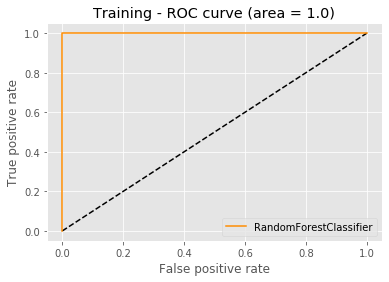

[[ 63   0]
 [  0 228]]

accuracy................. 1.0000
precision................ 1.0000
recall................... 1.0000
auc...................... 1.0000
F1 macro................. 1.0000
F1 micro................. 1.0000
F1 weighted.............. 1.0000
F1 binary................ 1.0000


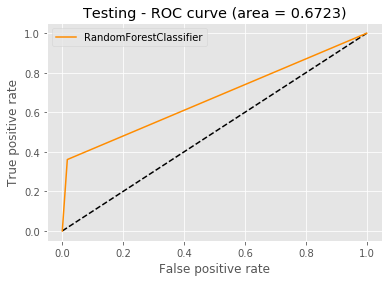

[[ 13  23]
 [  2 119]]

accuracy................. 0.8408
precision................ 0.8667
recall................... 0.3611
auc...................... 0.6723
F1 macro................. 0.7074
F1 micro................. 0.8408
F1 weighted.............. 0.8143
F1 binary................ 0.5098


In [88]:
model = train_random_forest(_x, 'canceled')

In [7]:
importances = pd.Series(model.feature_importances_, index = list(data.drop(['canceled'], axis = 1).columns)).to_frame().reset_index()
importances.columns = ['feature', 'importance']
importances.sort_values(by = 'importance', ascending = False)

,feature,importance
32,time_window,0.075139
2,avg_daily_actions,0.073795
4,n_actions,0.061000
15,n_sess,0.049444
14,n_likes,0.047435
13,n_home,0.043767
30,session_avg_songs,0.040979
3,avg_session_duration,0.040629
17,n_songs,0.038892
6,n_ads,0.037481


## Gradient Boosting

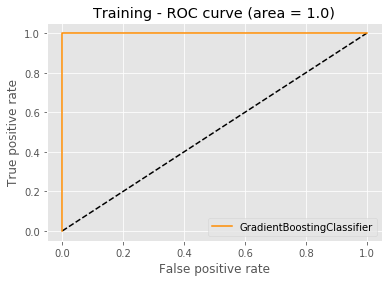

[[ 68   0]
 [  0 245]]

accuracy................. 1.0000
precision................ 1.0000
recall................... 1.0000
auc...................... 1.0000
F1 macro................. 1.0000
F1 micro................. 1.0000
F1 weighted.............. 1.0000
F1 binary................ 1.0000


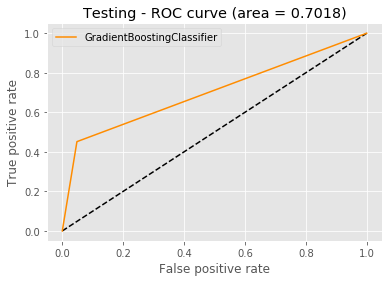

[[14 17]
 [ 5 99]]

accuracy................. 0.8370
precision................ 0.8534
recall................... 0.9519
auc...................... 0.7018
F1 macro................. 0.7300
F1 micro................. 0.8370
F1 weighted.............. 0.8219
F1 binary................ 0.5600


In [8]:
model = train_gradient_boosting(_x, 'canceled')

In [9]:
importances = pd.Series(model.feature_importances_, index = list(data.drop(['canceled'], axis = 1).columns)).to_frame().reset_index()
importances.columns = ['feature', 'importance']
importances.sort_values(by = 'importance', ascending = False)

,feature,importance
6,n_ads,0.160340
2,avg_daily_actions,0.088150
4,n_actions,0.081676
21,session_avg_ads,0.061612
18,n_upgrades,0.059232
16,n_settings,0.042320
3,avg_session_duration,0.042258
5,n_added_to_playlist,0.040279
17,n_songs,0.037339
32,time_window,0.036439


## Logistic Regression

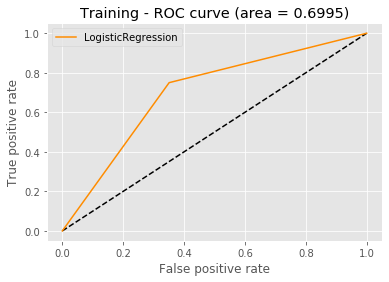

[[ 51  17]
 [ 86 159]]

accuracy................. 0.6709
precision................ 0.9034
recall................... 0.6490
auc...................... 0.6995
F1 macro................. 0.6265
F1 micro................. 0.6709
F1 weighted.............. 0.6993
F1 binary................ 0.4976


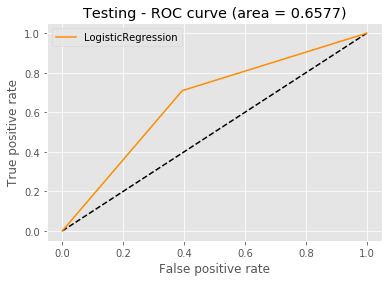

[[22  9]
 [41 63]]

accuracy................. 0.6296
precision................ 0.8750
recall................... 0.6058
auc...................... 0.6577
F1 macro................. 0.5920
F1 micro................. 0.6296
F1 weighted.............. 0.6590
F1 binary................ 0.4681


In [10]:
model = train_logistic_regression(_x, 'canceled')

In [11]:
importances = pd.Series(list(model.coef_[0]), index = list(data.drop(['canceled'], axis = 1).columns)).to_frame().reset_index()
importances.columns = ['feature', 'importance']
importances.sort_values(by = 'importance', ascending = False)

,feature,importance
4,n_actions,2.010731
2,avg_daily_actions,1.053481
6,n_ads,0.696270
31,session_avg_time_away,0.639855
17,n_songs,0.636539
19,session_avg_actions,0.347933
30,session_avg_songs,0.195094
13,n_home,0.153978
21,session_avg_ads,0.126844
3,avg_session_duration,0.104318


## ExtraTreesClassifier

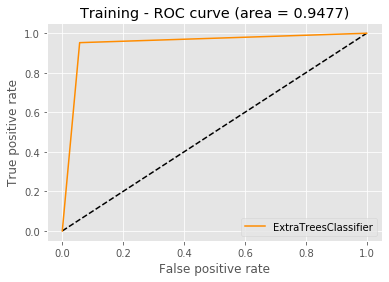

[[ 60   3]
 [ 13 215]]

accuracy................. 0.9450
precision................ 0.9862
recall................... 0.9430
auc...................... 0.9477
F1 macro................. 0.9232
F1 micro................. 0.9450
F1 weighted.............. 0.9464
F1 binary................ 0.8824


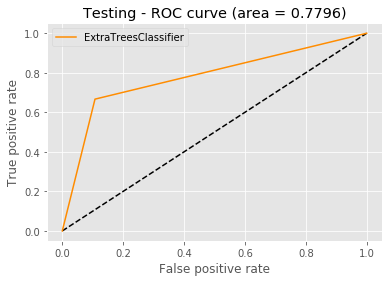

[[ 24  12]
 [ 13 108]]

accuracy................. 0.8408
precision................ 0.9000
recall................... 0.8926
auc...................... 0.7796
F1 macro................. 0.7769
F1 micro................. 0.8408
F1 weighted.............. 0.8415
F1 binary................ 0.6575


In [26]:
model = train_extra_trees_classifier(_x, 'canceled')

In [13]:
importances = pd.Series(model.feature_importances_, index = list(data.drop(['canceled'], axis = 1).columns)).to_frame().reset_index()
importances.columns = ['feature', 'importance']
importances.sort_values(by = 'importance', ascending = False)

,feature,importance
32,time_window,0.106147
4,n_actions,0.083365
6,n_ads,0.062375
15,n_sess,0.055450
18,n_upgrades,0.050652
17,n_songs,0.047927
16,n_settings,0.044916
2,avg_daily_actions,0.044351
14,n_likes,0.044047
13,n_home,0.035349


## Grid Search and Tuning

In [142]:
from sklearn.metrics import recall_score

y_true = [0, 1, 1, 0, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0]

recall_score(y_true, y_pred, labels = [1, 0])

0.25

Fitting 3 folds for each of 2376 candidates, totalling 7128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3840 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4576 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7128 out of 7128 | elapsed:  6.0min finished


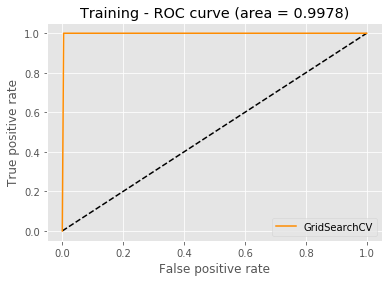

[[ 63   0]
 [  1 227]]

accuracy................. 0.9966
precision................ 0.9844
recall................... 1.0000
auc...................... 0.9978
beta..................... 0.9968
F1 macro................. 0.9950
F1 micro................. 0.9966
F1 weighted.............. 0.9966
F1 binary................ 0.9921


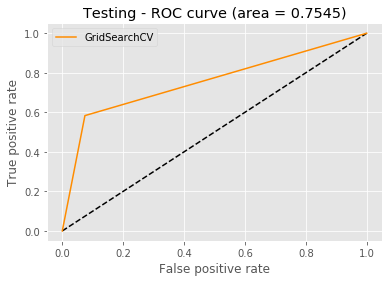

[[ 21  15]
 [  9 112]]

accuracy................. 0.8471
precision................ 0.7000
recall................... 0.5833
auc...................... 0.7545
beta..................... 0.6034
F1 macro................. 0.7698
F1 micro................. 0.8471
F1 weighted.............. 0.8420
F1 binary................ 0.6364


In [200]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)
 
    
_x = data.copy()
_x[features_to_normalize] = RobustScaler().fit_transform(_x[features_to_normalize]) 

model = train_gs_random_forest(_x, 'canceled')

Strategy: MaxAbsScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1971 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   21.1s finished


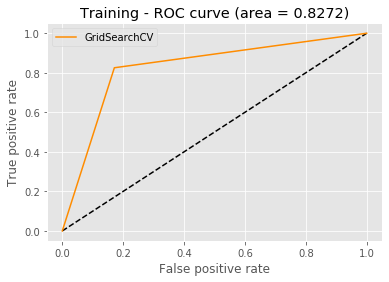

[[ 52  11]
 [ 39 189]]

accuracy................. 0.8282
precision................ 0.5714
recall................... 0.8254
auc...................... 0.8272
beta..................... 0.7580
F1 macro................. 0.7793
F1 micro................. 0.8282
F1 weighted.............. 0.8382
F1 binary................ 0.6753


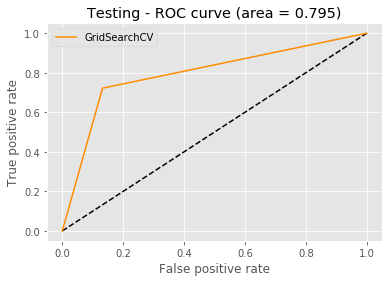

[[ 26  10]
 [ 16 105]]

accuracy................. 0.8344
precision................ 0.6190
recall................... 0.7222
auc...................... 0.7950
beta..................... 0.6989
F1 macro................. 0.7782
F1 micro................. 0.8344
F1 weighted.............. 0.8387
F1 binary................ 0.6667
Strategy: Normalizer
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1971 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   21.0s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


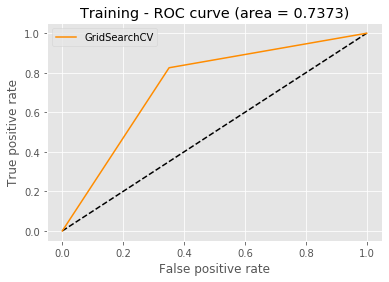

[[ 52  11]
 [ 80 148]]

accuracy................. 0.6873
precision................ 0.3939
recall................... 0.8254
auc...................... 0.7373
beta..................... 0.6771
F1 macro................. 0.6491
F1 micro................. 0.6873
F1 weighted.............. 0.7147
F1 binary................ 0.5333


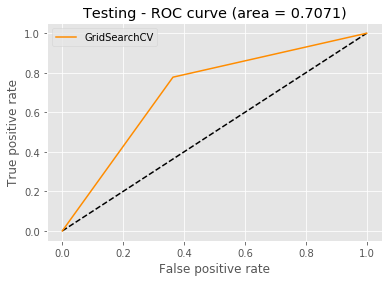

[[28  8]
 [44 77]]

accuracy................. 0.6688
precision................ 0.3889
recall................... 0.7778
auc...................... 0.7071
beta..................... 0.6481
F1 macro................. 0.6330
F1 micro................. 0.6688
F1 weighted.............. 0.6951
F1 binary................ 0.5185
Strategy: RobustScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 994 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1674 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 2570 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   23.7s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


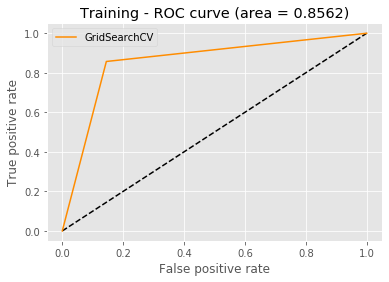

[[ 54   9]
 [ 33 195]]

accuracy................. 0.8557
precision................ 0.6207
recall................... 0.8571
auc...................... 0.8562
beta..................... 0.7965
F1 macro................. 0.8114
F1 micro................. 0.8557
F1 weighted.............. 0.8632
F1 binary................ 0.7200


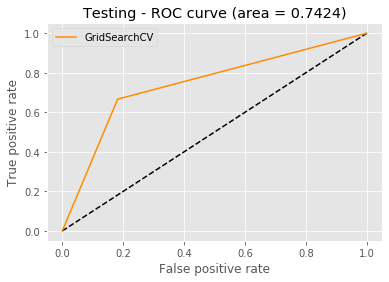

[[24 12]
 [22 99]]

accuracy................. 0.7834
precision................ 0.5217
recall................... 0.6667
auc...................... 0.7424
beta..................... 0.6316
F1 macro................. 0.7194
F1 micro................. 0.7834
F1 weighted.............. 0.7920
F1 binary................ 0.5854
Strategy: StandardScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1668 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 2564 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   23.1s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


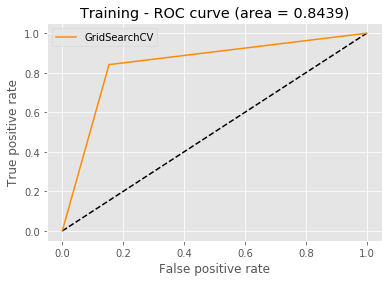

[[ 53  10]
 [ 35 193]]

accuracy................. 0.8454
precision................ 0.6023
recall................... 0.8413
auc...................... 0.8439
beta..................... 0.7794
F1 macro................. 0.7988
F1 micro................. 0.8454
F1 weighted.............. 0.8537
F1 binary................ 0.7020


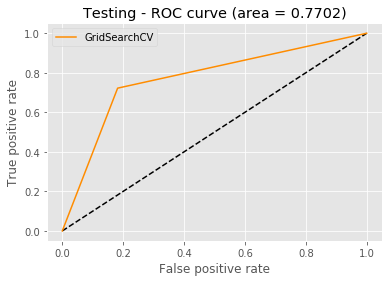

[[26 10]
 [22 99]]

accuracy................. 0.7962
precision................ 0.5417
recall................... 0.7222
auc...................... 0.7702
beta..................... 0.6771
F1 macro................. 0.7400
F1 micro................. 0.7962
F1 weighted.............. 0.8054
F1 binary................ 0.6190


In [180]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model = train_gs_logistic_regression(_x, 'canceled')

Strategy: MaxAbsScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 642 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1457 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 2577 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   21.7s finished


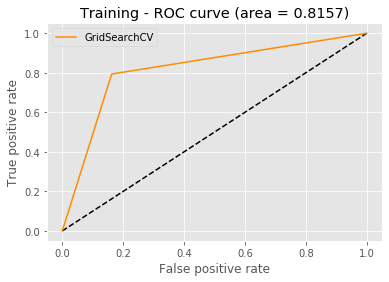

FNR Score is: 0.4571702244116037
[[ 50  13]
 [ 37 191]]

accuracy................. 0.8282
precision................ 0.5747
recall................... 0.7937
auc...................... 0.8157
FNR...................... 0.4572
F1 macro................. 0.7755
F1 micro................. 0.8282
F1 weighted.............. 0.8372
F1 binary................ 0.6667


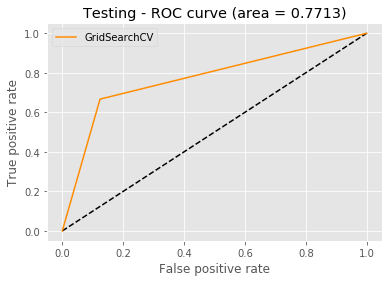

FNR Score is: 0.3771794871794872
[[ 24  12]
 [ 15 106]]

accuracy................. 0.8280
precision................ 0.6154
recall................... 0.6667
auc...................... 0.7713
FNR...................... 0.3772
F1 macro................. 0.7635
F1 micro................. 0.8280
F1 weighted.............. 0.8304
F1 binary................ 0.6400
Strategy: Normalizer
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 990 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1670 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 2566 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   21.6s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


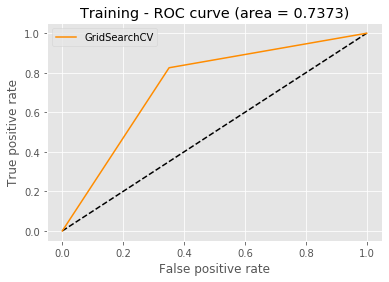

FNR Score is: 0.2945165945165946
[[ 52  11]
 [ 80 148]]

accuracy................. 0.6873
precision................ 0.3939
recall................... 0.8254
auc...................... 0.7373
FNR...................... 0.2945
F1 macro................. 0.6491
F1 micro................. 0.6873
F1 weighted.............. 0.7147
F1 binary................ 0.5333


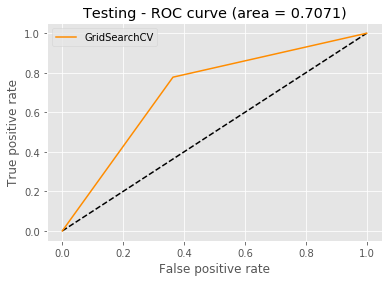

FNR Score is: 0.2546296296296296
[[28  8]
 [44 77]]

accuracy................. 0.6688
precision................ 0.3889
recall................... 0.7778
auc...................... 0.7071
FNR...................... 0.2546
F1 macro................. 0.6330
F1 micro................. 0.6688
F1 weighted.............. 0.6951
F1 binary................ 0.5185
Strategy: RobustScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1706 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 3050 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   24.9s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


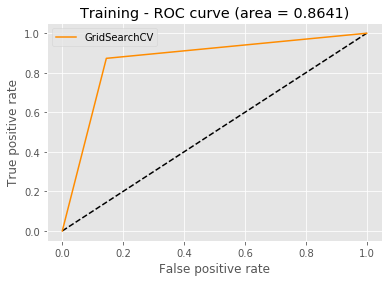

FNR Score is: 0.5712347576999895
[[ 55   8]
 [ 33 195]]

accuracy................. 0.8591
precision................ 0.6250
recall................... 0.8730
auc...................... 0.8641
FNR...................... 0.5712
F1 macro................. 0.8167
F1 micro................. 0.8591
F1 weighted.............. 0.8667
F1 binary................ 0.7285


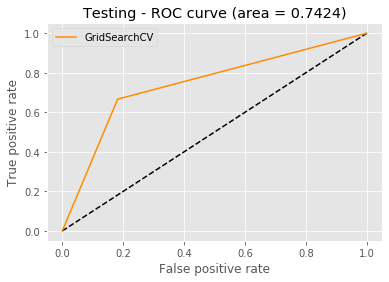

FNR Score is: 0.29913396960056554
[[24 12]
 [22 99]]

accuracy................. 0.7834
precision................ 0.5217
recall................... 0.6667
auc...................... 0.7424
FNR...................... 0.2991
F1 macro................. 0.7194
F1 micro................. 0.7834
F1 weighted.............. 0.7920
F1 binary................ 0.5854
Strategy: StandardScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 746 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1712 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   24.6s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


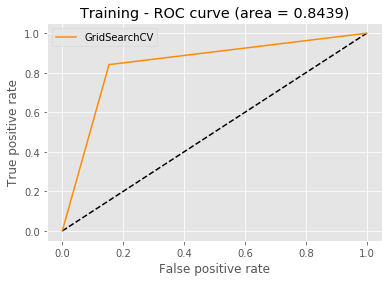

FNR Score is: 0.52318985741999
[[ 53  10]
 [ 35 193]]

accuracy................. 0.8454
precision................ 0.6023
recall................... 0.8413
auc...................... 0.8439
FNR...................... 0.5232
F1 macro................. 0.7988
F1 micro................. 0.8454
F1 weighted.............. 0.8537
F1 binary................ 0.7020


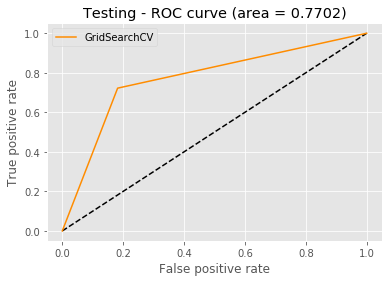

FNR Score is: 0.36557539682539675
[[26 10]
 [22 99]]

accuracy................. 0.7962
precision................ 0.5417
recall................... 0.7222
auc...................... 0.7702
FNR...................... 0.3656
F1 macro................. 0.7400
F1 micro................. 0.7962
F1 weighted.............. 0.8054
F1 binary................ 0.6190


In [136]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model = train_gs_logistic_regression(_x, 'canceled')

Strategy: MaxAbsScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 577 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1473 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 2625 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 3469 out of 3500 | elapsed:   23.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   23.2s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


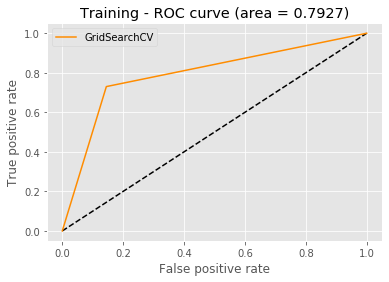

[[ 46  17]
 [ 33 195]]

accuracy................. 0.8282
precision................ 0.5823
recall................... 0.7302
auc...................... 0.7927
FNR...................... 0.2698
F1 macro................. 0.7671
F1 micro................. 0.8282
F1 weighted.............. 0.8347
F1 binary................ 0.6479


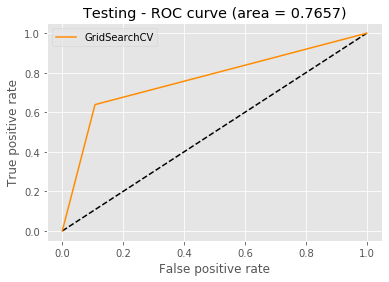

[[ 23  13]
 [ 13 108]]

accuracy................. 0.8344
precision................ 0.6389
recall................... 0.6389
auc...................... 0.7657
FNR...................... 0.3611
F1 macro................. 0.7657
F1 micro................. 0.8344
F1 weighted.............. 0.8344
F1 binary................ 0.6389
Strategy: Normalizer
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 900 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 1596 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 2492 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   21.7s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


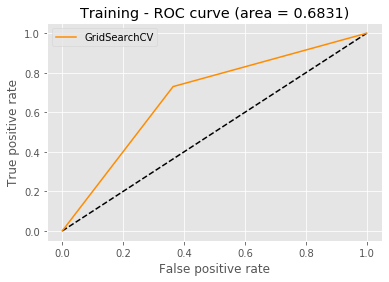

[[ 46  17]
 [ 83 145]]

accuracy................. 0.6564
precision................ 0.3566
recall................... 0.7302
auc...................... 0.6831
FNR...................... 0.2698
F1 macro................. 0.6114
F1 micro................. 0.6564
F1 weighted.............. 0.6863
F1 binary................ 0.4792


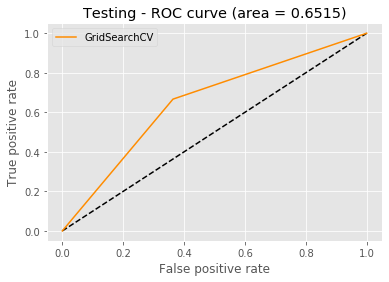

[[24 12]
 [44 77]]

accuracy................. 0.6433
precision................ 0.3529
recall................... 0.6667
auc...................... 0.6515
FNR...................... 0.3333
F1 macro................. 0.5974
F1 micro................. 0.6433
F1 weighted.............. 0.6710
F1 binary................ 0.4615
Strategy: RobustScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1628 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 2524 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   24.6s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


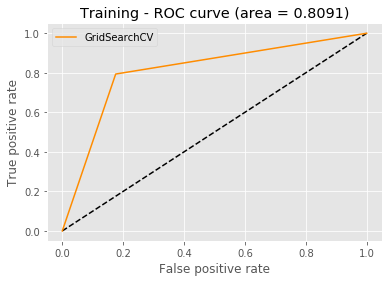

[[ 50  13]
 [ 40 188]]

accuracy................. 0.8179
precision................ 0.5556
recall................... 0.7937
auc...................... 0.8091
FNR...................... 0.2063
F1 macro................. 0.7650
F1 micro................. 0.8179
F1 weighted.............. 0.8282
F1 binary................ 0.6536


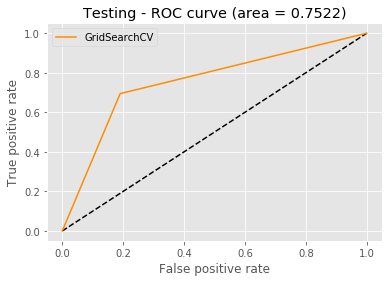

[[25 11]
 [23 98]]

accuracy................. 0.7834
precision................ 0.5208
recall................... 0.6944
auc...................... 0.7522
FNR...................... 0.3056
F1 macro................. 0.7237
F1 micro................. 0.7834
F1 weighted.............. 0.7933
F1 binary................ 0.5952
Strategy: StandardScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 2528 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   23.9s finished


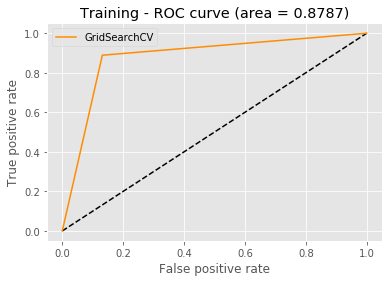

[[ 56   7]
 [ 30 198]]

accuracy................. 0.8729
precision................ 0.6512
recall................... 0.8889
auc...................... 0.8787
FNR...................... 0.1111
F1 macro................. 0.8331
F1 micro................. 0.8729
F1 weighted.............. 0.8793
F1 binary................ 0.7517


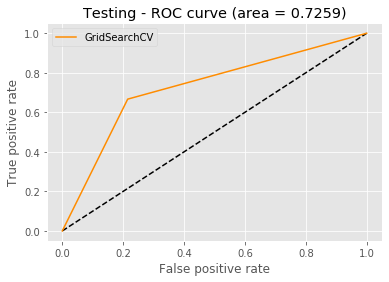

[[24 12]
 [26 95]]

accuracy................. 0.7580
precision................ 0.4800
recall................... 0.6667
auc...................... 0.7259
FNR...................... 0.3333
F1 macro................. 0.6957
F1 micro................. 0.7580
F1 weighted.............. 0.7702
F1 binary................ 0.5581


In [97]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model = train_gs_logistic_regression(_x, 'canceled')

Strategy: MaxAbsScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1571 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 2723 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   22.5s finished


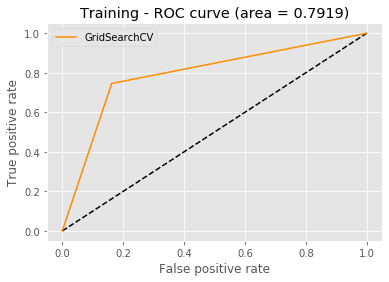

[[ 47  16]
 [ 37 191]]

accuracy................. 0.8179
precision................ 0.5595
recall................... 0.7460
auc...................... 0.7919
F1 macro................. 0.7588
F1 micro................. 0.8179
F1 weighted.............. 0.8265
F1 binary................ 0.6395


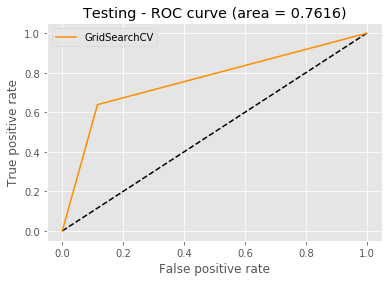

[[ 23  13]
 [ 14 107]]

accuracy................. 0.8280
precision................ 0.6216
recall................... 0.6389
auc...................... 0.7616
F1 macro................. 0.7591
F1 micro................. 0.8280
F1 weighted.............. 0.8288
F1 binary................ 0.6301
Strategy: Normalizer
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1971 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   21.0s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


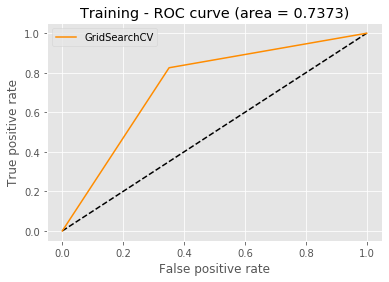

[[ 52  11]
 [ 80 148]]

accuracy................. 0.6873
precision................ 0.3939
recall................... 0.8254
auc...................... 0.7373
F1 macro................. 0.6491
F1 micro................. 0.6873
F1 weighted.............. 0.7147
F1 binary................ 0.5333


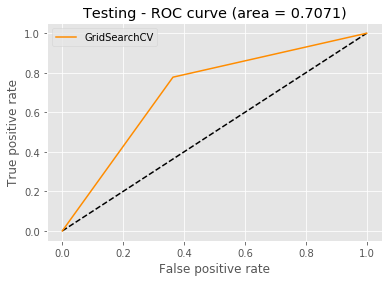

[[28  8]
 [44 77]]

accuracy................. 0.6688
precision................ 0.3889
recall................... 0.7778
auc...................... 0.7071
F1 macro................. 0.6330
F1 micro................. 0.6688
F1 weighted.............. 0.6951
F1 binary................ 0.5185
Strategy: RobustScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1971 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 3469 out of 3500 | elapsed:   23.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   24.2s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


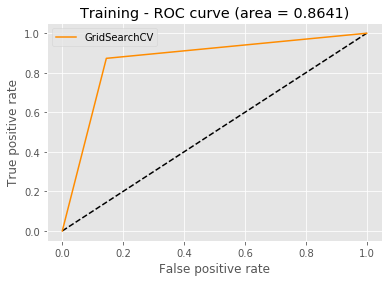

[[ 55   8]
 [ 33 195]]

accuracy................. 0.8591
precision................ 0.6250
recall................... 0.8730
auc...................... 0.8641
F1 macro................. 0.8167
F1 micro................. 0.8591
F1 weighted.............. 0.8667
F1 binary................ 0.7285


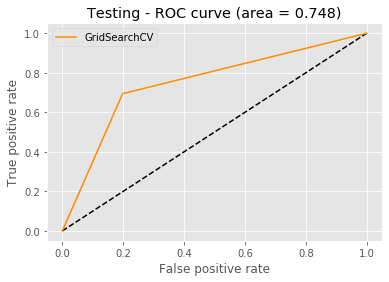

[[25 11]
 [24 97]]

accuracy................. 0.7771
precision................ 0.5102
recall................... 0.6944
auc...................... 0.7480
F1 macro................. 0.7177
F1 micro................. 0.7771
F1 weighted.............. 0.7878
F1 binary................ 0.5882
Strategy: StandardScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1971 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 3469 out of 3500 | elapsed:   22.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   23.4s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


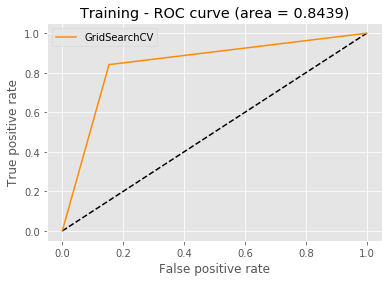

[[ 53  10]
 [ 35 193]]

accuracy................. 0.8454
precision................ 0.6023
recall................... 0.8413
auc...................... 0.8439
F1 macro................. 0.7988
F1 micro................. 0.8454
F1 weighted.............. 0.8537
F1 binary................ 0.7020


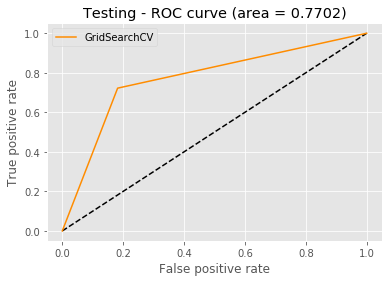

[[26 10]
 [22 99]]

accuracy................. 0.7962
precision................ 0.5417
recall................... 0.7222
auc...................... 0.7702
F1 macro................. 0.7400
F1 micro................. 0.7962
F1 weighted.............. 0.8054
F1 binary................ 0.6190


In [89]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model = train_gs_logistic_regression(_x, 'canceled')

Strategy: MaxAbsScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1648 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 2544 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   20.9s finished


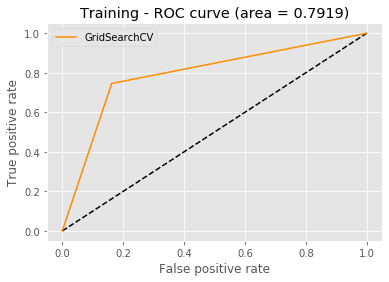

[[ 47  16]
 [ 37 191]]

accuracy................. 0.8179
precision................ 0.9227
recall................... 0.8377
auc...................... 0.7919
F1 macro................. 0.7588
F1 micro................. 0.8179
F1 weighted.............. 0.8265
F1 binary................ 0.6395


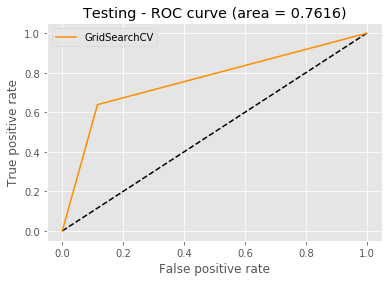

[[ 23  13]
 [ 14 107]]

accuracy................. 0.8280
precision................ 0.8917
recall................... 0.8843
auc...................... 0.7616
F1 macro................. 0.7591
F1 micro................. 0.8280
F1 weighted.............. 0.8288
F1 binary................ 0.6301
Strategy: Normalizer
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1003 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1693 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 2589 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 3469 out of 3500 | elapsed:   20.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   20.8s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


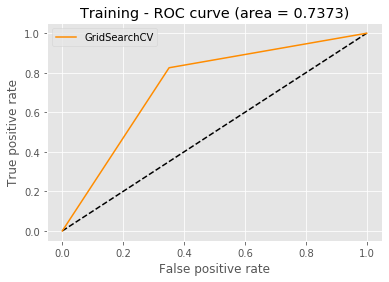

[[ 52  11]
 [ 80 148]]

accuracy................. 0.6873
precision................ 0.9308
recall................... 0.6491
auc...................... 0.7373
F1 macro................. 0.6491
F1 micro................. 0.6873
F1 weighted.............. 0.7147
F1 binary................ 0.5333


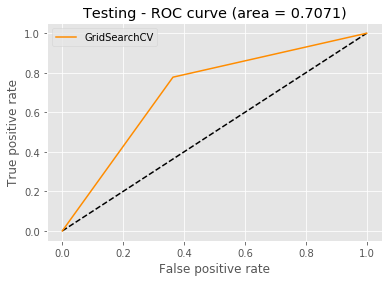

[[28  8]
 [44 77]]

accuracy................. 0.6688
precision................ 0.9059
recall................... 0.6364
auc...................... 0.7071
F1 macro................. 0.6330
F1 micro................. 0.6688
F1 weighted.............. 0.6951
F1 binary................ 0.5185
Strategy: RobustScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   23.7s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


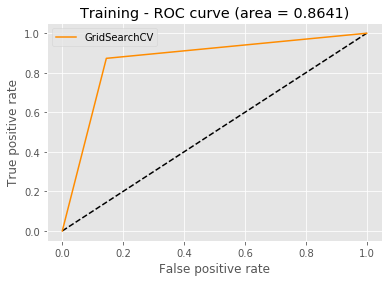

[[ 55   8]
 [ 33 195]]

accuracy................. 0.8591
precision................ 0.9606
recall................... 0.8553
auc...................... 0.8641
F1 macro................. 0.8167
F1 micro................. 0.8591
F1 weighted.............. 0.8667
F1 binary................ 0.7285


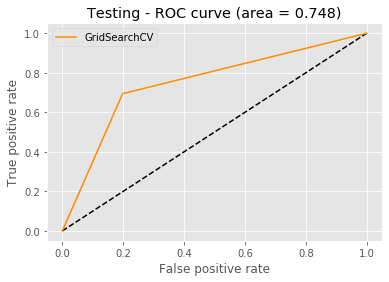

[[25 11]
 [24 97]]

accuracy................. 0.7771
precision................ 0.8981
recall................... 0.8017
auc...................... 0.7480
F1 macro................. 0.7177
F1 micro................. 0.7771
F1 weighted.............. 0.7878
F1 binary................ 0.5882
Strategy: StandardScaler
Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1897 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 3017 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:   23.2s finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


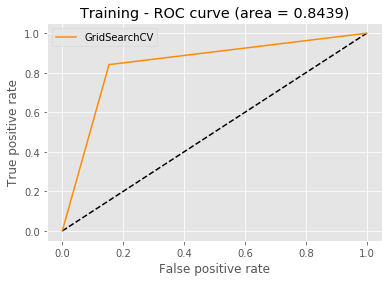

[[ 53  10]
 [ 35 193]]

accuracy................. 0.8454
precision................ 0.9507
recall................... 0.8465
auc...................... 0.8439
F1 macro................. 0.7988
F1 micro................. 0.8454
F1 weighted.............. 0.8537
F1 binary................ 0.7020


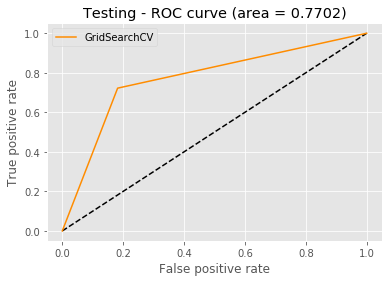

[[26 10]
 [22 99]]

accuracy................. 0.7962
precision................ 0.9083
recall................... 0.8182
auc...................... 0.7702
F1 macro................. 0.7400
F1 micro................. 0.7962
F1 weighted.............. 0.8054
F1 binary................ 0.6190


In [30]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model = train_gs_logistic_regression(_x, 'canceled')

Strategy: MaxAbsScaler
Fitting 3 folds for each of 2250 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 693 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1589 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 2741 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 4149 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 4863 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 5343 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 5887 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 6495 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6750 out of 6750 | elapsed:  1.4min finished


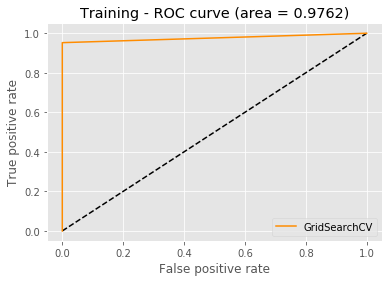

[[ 60   3]
 [  0 228]]

accuracy................. 0.9897
precision................ 0.9870
recall................... 1.0000
auc...................... 0.9762
F1 macro................. 0.9845
F1 micro................. 0.9897
F1 weighted.............. 0.9896
F1 binary................ 0.9756


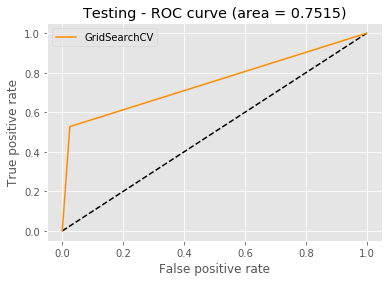

[[ 19  17]
 [  3 118]]

accuracy................. 0.8726
precision................ 0.8741
recall................... 0.9752
auc...................... 0.7515
F1 macro................. 0.7885
F1 micro................. 0.8726
F1 weighted.............. 0.8607
F1 binary................ 0.6552


In [23]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

models = []

for _scaller in [MaxAbsScaler()]:# [Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model, X_test, y_test = train_gs_gradient_boosting(_x, 'canceled')
    
    models.append(model.best_estimator_)


# model, X_test, y_test = train_gs_gradient_boosting(_x, 'canceled')

# best_model = model.best_estimator_

# y_predicted = model.predict(X_test)
# plot_roc_curve(y_test, y_predicted, model, 'Testing')
# plot_metrics(y_test, y_predicted)

In [24]:
model.best_estimator_.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.25,
 'loss': 'exponential',
 'max_depth': 4,
 'max_features': 32,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': 10,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 0.99,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [140]:
importances = pd.Series(best_model.feature_importances_, index = list(data.drop(['canceled'], axis = 1).columns)).to_frame().reset_index()
importances.columns = ['feature', 'importance']
importances.sort_values(by = 'importance', ascending = False)

,feature,importance
6,n_ads,0.113594
32,time_window,0.104322
4,n_actions,0.090916
18,n_upgrades,0.084942
15,n_sess,0.064454
14,n_likes,0.049799
22,session_avg_dislikes,0.044507
29,session_avg_settings,0.043973
2,avg_daily_actions,0.040238
17,n_songs,0.036719


Fitting 5 folds for each of 3750 candidates, totalling 18750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5088 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5997 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6669 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 7405 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 8205 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 9069 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 9997 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 10989 tasks     

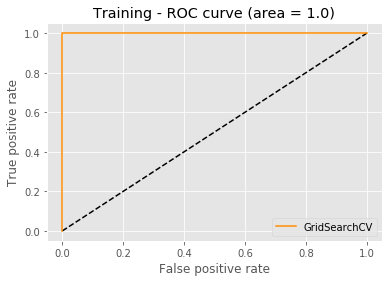

[[ 68   0]
 [  0 245]]

accuracy................. 1.0000
precision................ 1.0000
recall................... 1.0000
auc...................... 1.0000
F1 macro................. 1.0000
F1 micro................. 1.0000
F1 weighted.............. 1.0000
F1 binary................ 1.0000


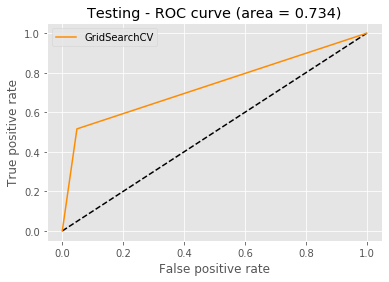

[[16 15]
 [ 5 99]]

accuracy................. 0.8519
precision................ 0.8684
recall................... 0.9519
auc...................... 0.7340
F1 macro................. 0.7618
F1 micro................. 0.8519
F1 weighted.............. 0.8410
F1 binary................ 0.6154


In [156]:
model, X_test, y_test = train_gs_gradient_boosting(_x, 'canceled')

best_model = model.best_estimator_

# y_predicted = model.predict(X_test)
# plot_roc_curve(y_test, y_predicted, model, 'Testing')
# plot_metrics(y_test, y_predicted)

In [1]:
# import libxgboost
# ! pip install xgboost

# from '.' import xgboost

import sys

# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/bruno/LIBS/xgboost')

# xgb.__file__

In [13]:
import xgboost

/home/bruno/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
xgboost.__file__

'/home/bruno/anaconda3/lib/python3.7/site-packages/xgboost/__init__.py'

In [8]:

def train_xgboost(df, label): # predictor='gpu_predictor'
    
    # gpu:binary:logistic
    xgbc = xgboost.XGBClassifier(objective='binary:logistic')
    # xgbc = xgboost.XGBClassifier(tree_method='gpu_hist',predictor='gpu_predictor', updater='grow_gpu_hist', gpu_id=0)
    return train_model(df, label, xgbc)

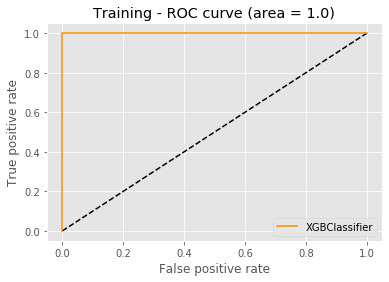

[[ 78   0]
 [  0 280]]

accuracy................. 1.0000
precision................ 1.0000
recall................... 1.0000
auc...................... 1.0000
F1 macro................. 1.0000
F1 micro................. 1.0000
F1 weighted.............. 1.0000
F1 binary................ 1.0000


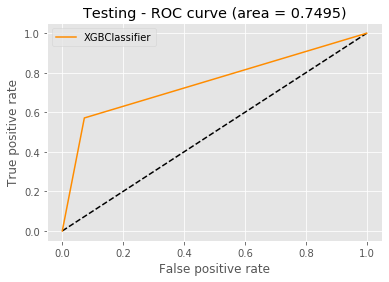

[[12  9]
 [ 5 64]]

accuracy................. 0.8444
precision................ 0.8767
recall................... 0.9275
auc...................... 0.7495
F1 macro................. 0.7665
F1 micro................. 0.8444
F1 weighted.............. 0.8384
F1 binary................ 0.6316


In [80]:
model = train_xgboost(_x, 'canceled')

Strategy: MaxAbsScaler
Fitting 3 folds for each of 11340 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 3840 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 4576 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 8160 tasks      |

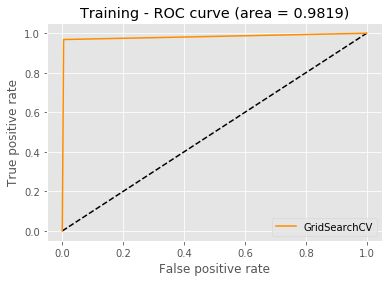

[[ 61   2]
 [  1 227]]

accuracy................. 0.9897
precision................ 0.9839
recall................... 0.9683
auc...................... 0.9819
beta..................... 0.9713
F1 macro................. 0.9847
F1 micro................. 0.9897
F1 weighted.............. 0.9897
F1 binary................ 0.9760


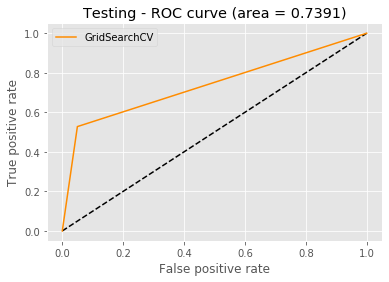

[[ 19  17]
 [  6 115]]

accuracy................. 0.8535
precision................ 0.7600
recall................... 0.5278
auc...................... 0.7391
beta..................... 0.5621
F1 macro................. 0.7660
F1 micro................. 0.8535
F1 weighted.............. 0.8435
F1 binary................ 0.6230
Strategy: Normalizer
Fitting 3 folds for each of 11340 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 3802 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 4634 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 5594 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6682 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 7898 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 10714 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 12314 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 14042 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 15898 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 17882 tasks

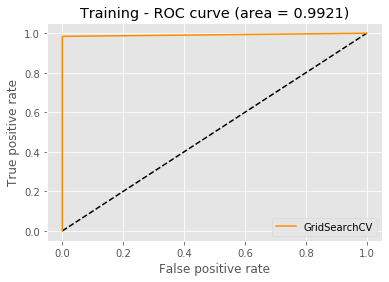

[[ 62   1]
 [  0 228]]

accuracy................. 0.9966
precision................ 1.0000
recall................... 0.9841
auc...................... 0.9921
beta..................... 0.9873
F1 macro................. 0.9949
F1 micro................. 0.9966
F1 weighted.............. 0.9966
F1 binary................ 0.9920


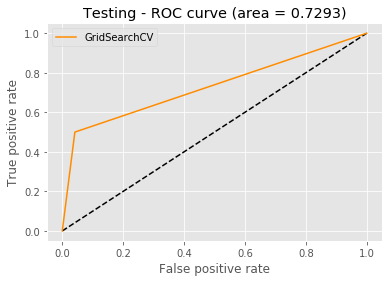

[[ 18  18]
 [  5 116]]

accuracy................. 0.8535
precision................ 0.7826
recall................... 0.5000
auc...................... 0.7293
beta..................... 0.5389
F1 macro................. 0.7600
F1 micro................. 0.8535
F1 weighted.............. 0.8411
F1 binary................ 0.6102
Strategy: RobustScaler
Fitting 3 folds for each of 11340 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 6048 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7968 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10122 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 11344 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 12688 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 14160 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 15760 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 17488 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 19344 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 21328 ta

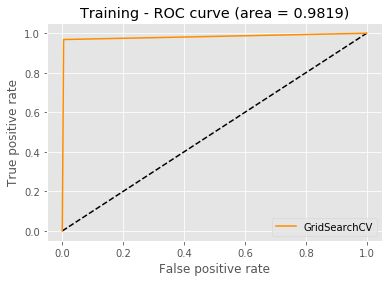

[[ 61   2]
 [  1 227]]

accuracy................. 0.9897
precision................ 0.9839
recall................... 0.9683
auc...................... 0.9819
beta..................... 0.9713
F1 macro................. 0.9847
F1 micro................. 0.9897
F1 weighted.............. 0.9897
F1 binary................ 0.9760


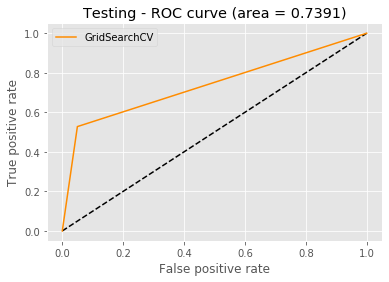

[[ 19  17]
 [  6 115]]

accuracy................. 0.8535
precision................ 0.7600
recall................... 0.5278
auc...................... 0.7391
beta..................... 0.5621
F1 macro................. 0.7660
F1 micro................. 0.8535
F1 weighted.............. 0.8435
F1 binary................ 0.6230
Strategy: StandardScaler
Fitting 3 folds for each of 11340 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 6048 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7968 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10144 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 12576 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 15264 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 18208 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 21408 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 24864 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 27930 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 29914 ta

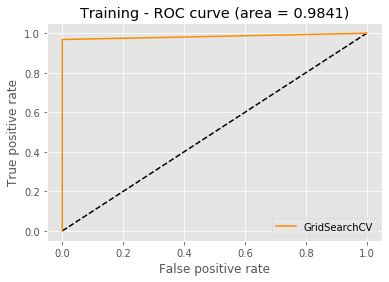

[[ 61   2]
 [  0 228]]

accuracy................. 0.9931
precision................ 1.0000
recall................... 0.9683
auc...................... 0.9841
beta..................... 0.9744
F1 macro................. 0.9898
F1 micro................. 0.9931
F1 weighted.............. 0.9931
F1 binary................ 0.9839


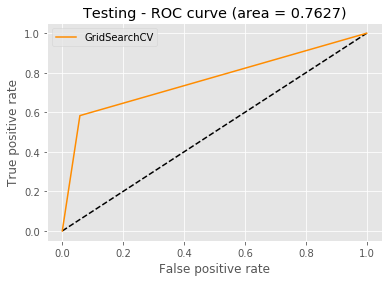

[[ 21  15]
 [  7 114]]

accuracy................. 0.8599
precision................ 0.7500
recall................... 0.5833
auc...................... 0.7627
beta..................... 0.6105
F1 macro................. 0.7841
F1 micro................. 0.8599
F1 weighted.............. 0.8534
F1 binary................ 0.6562


In [224]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

models = []

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model = train_gs_xgb(_x, 'canceled')
    
    models.append(model.best_estimator_)

Strategy: MaxAbsScaler
Fitting 3 folds for each of 5670 candidates, totalling 17010 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 6048 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7968 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 10144 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 12576 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 15264 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 17010 out of 17010 | elapsed:  3.2min finished


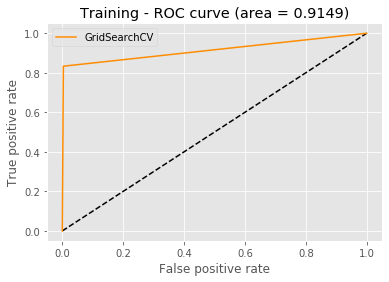

[[ 65  13]
 [  1 279]]

accuracy................. 0.9609
precision................ 0.9555
recall................... 0.9964
auc...................... 0.9149
F1 macro................. 0.9392
F1 micro................. 0.9609
F1 weighted.............. 0.9597
F1 binary................ 0.9028


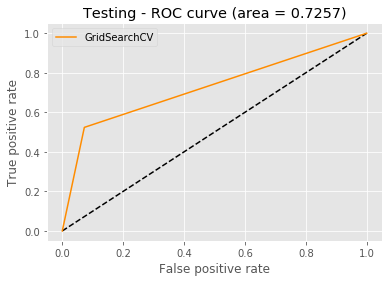

[[11 10]
 [ 5 64]]

accuracy................. 0.8333
precision................ 0.8649
recall................... 0.9275
auc...................... 0.7257
F1 macro................. 0.7448
F1 micro................. 0.8333
F1 weighted.............. 0.8250
F1 binary................ 0.5946
Strategy: Normalizer
Fitting 3 folds for each of 5670 candidates, totalling 17010 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1566 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 2142 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 2846 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 3678 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 4638 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 5726 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6942 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 8286 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 9758 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 11358 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 13086 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 14942 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 16926 tasks 

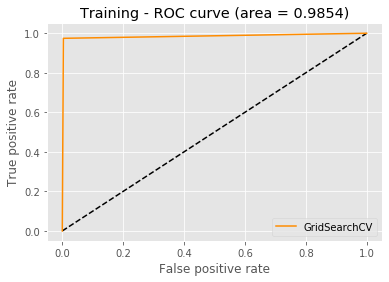

[[ 76   2]
 [  1 279]]

accuracy................. 0.9916
precision................ 0.9929
recall................... 0.9964
auc...................... 0.9854
F1 macro................. 0.9876
F1 micro................. 0.9916
F1 weighted.............. 0.9916
F1 binary................ 0.9806


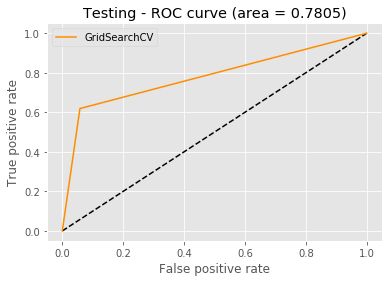

[[13  8]
 [ 4 65]]

accuracy................. 0.8667
precision................ 0.8904
recall................... 0.9420
auc...................... 0.7805
F1 macro................. 0.7999
F1 micro................. 0.8667
F1 weighted.............. 0.8615
F1 binary................ 0.6842
Strategy: RobustScaler
Fitting 3 folds for each of 5670 candidates, totalling 17010 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1124 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 2660 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 3716 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 6404 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8036 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9860 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 11876 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 14084 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 16484 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 16979 out of 17010 | elapsed:  3.2min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 17010 out of 17010 | elapsed:  3.2min finished


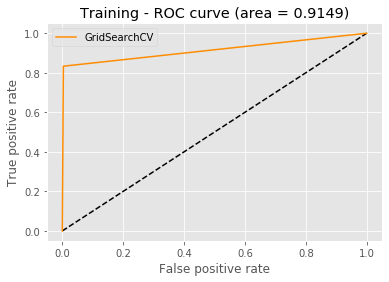

[[ 65  13]
 [  1 279]]

accuracy................. 0.9609
precision................ 0.9555
recall................... 0.9964
auc...................... 0.9149
F1 macro................. 0.9392
F1 micro................. 0.9609
F1 weighted.............. 0.9597
F1 binary................ 0.9028


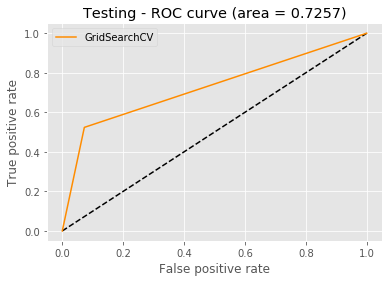

[[11 10]
 [ 5 64]]

accuracy................. 0.8333
precision................ 0.8649
recall................... 0.9275
auc...................... 0.7257
F1 macro................. 0.7448
F1 micro................. 0.8333
F1 weighted.............. 0.8250
F1 binary................ 0.5946
Strategy: StandardScaler
Fitting 3 folds for each of 5670 candidates, totalling 17010 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1106 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 1778 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 2642 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 3698 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 4946 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 6386 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 8018 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9842 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 11858 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 14066 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 16466 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 16979 out of 17010 | elapsed:  3.2min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 17010 out of 17010 | elapsed:  3.2min finished


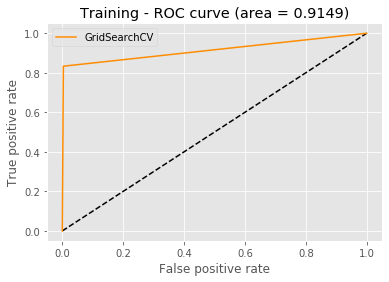

[[ 65  13]
 [  1 279]]

accuracy................. 0.9609
precision................ 0.9555
recall................... 0.9964
auc...................... 0.9149
F1 macro................. 0.9392
F1 micro................. 0.9609
F1 weighted.............. 0.9597
F1 binary................ 0.9028


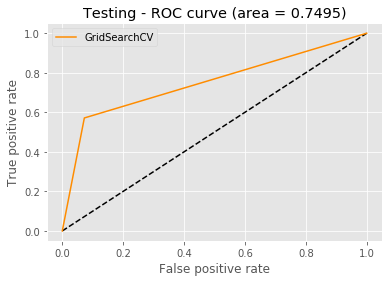

[[12  9]
 [ 5 64]]

accuracy................. 0.8444
precision................ 0.8767
recall................... 0.9275
auc...................... 0.7495
F1 macro................. 0.7665
F1 micro................. 0.8444
F1 weighted.............. 0.8384
F1 binary................ 0.6316


In [180]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

models = []

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model = train_gs_xgb(_x, 'canceled')
    
    models.append(model.best_estimator_)

In [181]:
models

[XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.9, gamma=1.5, gpu_id=-1,
               importance_type='gain', interaction_constraints=None,
               learning_rate=0.02, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=0, num_parallel_tree=1,
               objective='binary:logistic', random_state=42, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
               validate_parameters=False, verbosity=None),
 XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
               importance_type='gain', interaction_constraints=None,
               learning_rate=0.1, max_delta_step=0, max_depth=6,
               min_child_weight=5, missing=nan, monotone_constraints=None,
              

Strategy: MaxAbsScaler
Fitting 3 folds for each of 11340 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 6048 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7968 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 10144 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 12576 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 15264 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 18208 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 20934 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 22662 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 24518 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 26502 ta

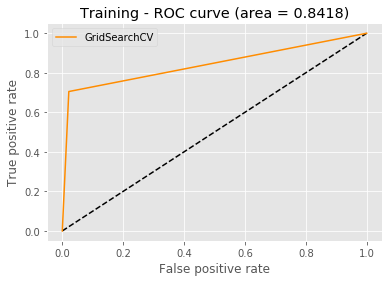

[[ 55  23]
 [  6 274]]

accuracy................. 0.9190
precision................ 0.9226
recall................... 0.9786
auc...................... 0.8418
F1 macro................. 0.8706
F1 micro................. 0.9190
F1 weighted.............. 0.9152
F1 binary................ 0.7914


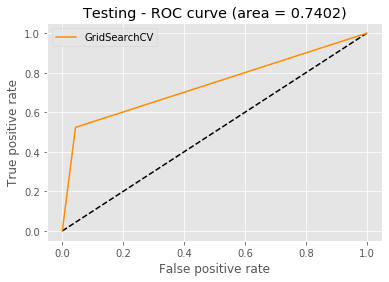

[[11 10]
 [ 3 66]]

accuracy................. 0.8556
precision................ 0.8684
recall................... 0.9565
auc...................... 0.7402
F1 macro................. 0.7695
F1 micro................. 0.8556
F1 weighted.............. 0.8446
F1 binary................ 0.6286
Strategy: Normalizer
Fitting 3 folds for each of 11340 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 3854 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 4686 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 5646 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6734 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7950 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9294 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 10766 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 12366 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 14094 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 15950 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 17934 tasks

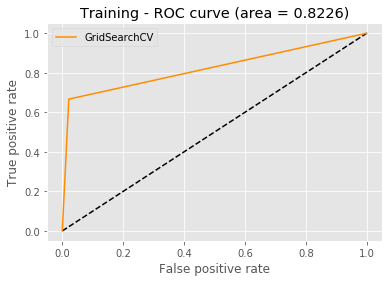

[[ 52  26]
 [  6 274]]

accuracy................. 0.9106
precision................ 0.9133
recall................... 0.9786
auc...................... 0.8226
F1 macro................. 0.8548
F1 micro................. 0.9106
F1 weighted.............. 0.9056
F1 binary................ 0.7647


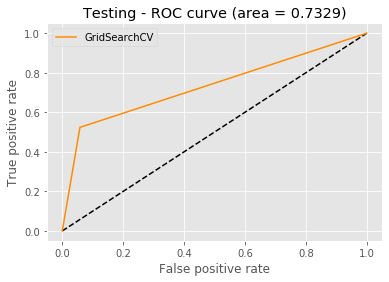

[[11 10]
 [ 4 65]]

accuracy................. 0.8444
precision................ 0.8667
recall................... 0.9420
auc...................... 0.7329
F1 macro................. 0.7569
F1 micro................. 0.8444
F1 weighted.............. 0.8347
F1 binary................ 0.6111
Strategy: RobustScaler
Fitting 3 folds for each of 11340 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 6048 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7968 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 10144 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 12576 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 15264 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 18208 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 21408 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 24864 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 27946 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 29930 ta

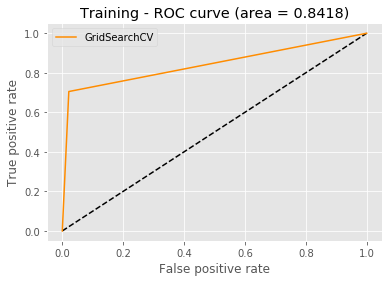

[[ 55  23]
 [  6 274]]

accuracy................. 0.9190
precision................ 0.9226
recall................... 0.9786
auc...................... 0.8418
F1 macro................. 0.8706
F1 micro................. 0.9190
F1 weighted.............. 0.9152
F1 binary................ 0.7914


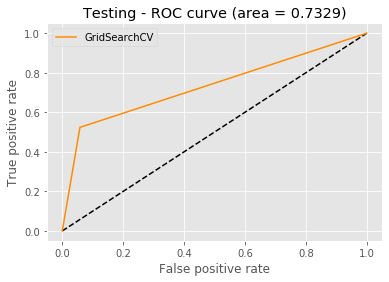

[[11 10]
 [ 4 65]]

accuracy................. 0.8444
precision................ 0.8667
recall................... 0.9420
auc...................... 0.7329
F1 macro................. 0.7569
F1 micro................. 0.8444
F1 weighted.............. 0.8347
F1 binary................ 0.6111
Strategy: StandardScaler
Fitting 3 folds for each of 11340 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1133 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 1805 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 2669 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 3725 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 4973 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 6413 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 8045 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9869 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11885 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 14093 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 16493 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 19085 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 21869 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 24845 tas

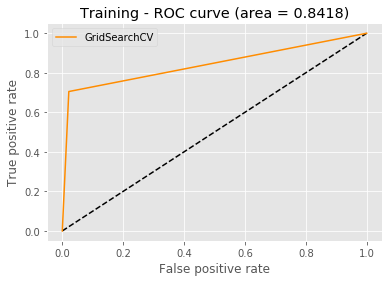

[[ 55  23]
 [  6 274]]

accuracy................. 0.9190
precision................ 0.9226
recall................... 0.9786
auc...................... 0.8418
F1 macro................. 0.8706
F1 micro................. 0.9190
F1 weighted.............. 0.9152
F1 binary................ 0.7914


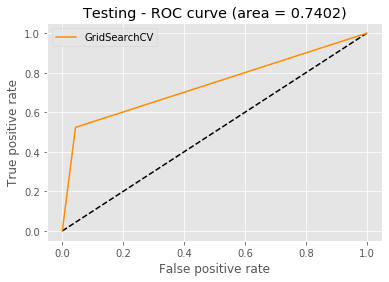

[[11 10]
 [ 3 66]]

accuracy................. 0.8556
precision................ 0.8684
recall................... 0.9565
auc...................... 0.7402
F1 macro................. 0.7695
F1 micro................. 0.8556
F1 weighted.............. 0.8446
F1 binary................ 0.6286


In [184]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

models = []

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model = train_gs_xgb(_x, 'canceled')
    
    models.append(model.best_estimator_)

In [31]:
def __bootstrap__():
    global __bootstrap__, __loader__, __file__
    import sys, pkg_resources, imp
    # __name__ = ''
    __file__ = pkg_resources.resource_filename(__name__, '/home/bruno/LIBS/xgboost/lib/libxgboost.so')
    print(__file__)
    # __loader__ = None; del __bootstrap__, __loader__
    # imp.load_dynamic(__name__,__file__)
    
__bootstrap__()

home/bruno/LIBS/xgboost/lib/libxgboost.so


In [22]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MaxAbsScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

models = []

for _scaller in [MaxAbsScaler(), Normalizer(), RobustScaler(), StandardScaler()]:
    
    print(f'Strategy: {_scaller.__class__.__name__}')
    
    _x = data.copy()
    _x[features_to_normalize] = _scaller.fit_transform(_x[features_to_normalize]) 
    
    model = train_gs_xgb(_x, 'canceled')
    
    model._Booster.__del__()
    gc.collect()
    
    # models.append(model.best_estimator_)

Strategy: MaxAbsScaler
Fitting 3 folds for each of 11340 candidates, totalling 34020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3840 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4576 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 8160 tasks      |

KeyboardInterrupt: 

In [ ]:
xgb.XGBClassifier(random_state = 42).get_params()

In [29]:
xgb.XGBClassifier(random_state = 42).get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None}

In [28]:
dir(xgb.XGBClassifier(random_state = 42))

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 'apply',
 'base_score',
 'booster',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',
 'get_booster',
 'get_num_boosting_rounds',
 'get_params',
 'get_xgb_params',
 'gpu_id',
 'importance_type',
 'interaction_constraints',
 'intercept_',
 'kwargs',
 'learning_rate',
 'load_model',
 'max_delta_step',
 'max_depth',
 'min_child_weight',
 'missing',
 'monotone_constraints',
 'n_estimators',
 'n_jobs',
 'num_parallel_tree',
 'objective',
 'pred

In [31]:
GradientBoostingClassifier(n_estimators = 200, max_depth = 6, learning_rate = 0.1, random_state = 42).get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [202]:
import xgboost
import xgboost as xgb

/home/bruno/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
import xgboost as xgb
from sklearn.datasets import load_boston

import gc 

boston = load_boston()

# XGBoost API example
params = {'tree_method': 'gpu_hist', 'max_depth': 3, 'learning_rate': 0.1}
dtrain = xgb.DMatrix(boston.data, boston.target)
model = xgb.train(params, dtrain, evals=[(dtrain, "train")])

model.__del__()
gc.collect()

# sklearn API example
# gbm = xgb.XGBRegressor(silent=False, n_estimators=10, tree_method='gpu_hist')
# gbm.fit(boston.data, boston.target, eval_set=[(boston.data, boston.target)])

[17:58:55] WARNING: /home/bruno/LIBS/xgboost/src/learner.cc:473: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:21.60208
[1]	train-rmse:19.55555
[2]	train-rmse:17.71453
[3]	train-rmse:16.06085
[4]	train-rmse:14.57073
[5]	train-rmse:13.23523
[6]	train-rmse:12.03749
[7]	train-rmse:10.94952
[8]	train-rmse:9.98234
[9]	train-rmse:9.10538


23363

In [6]:
gbm = xgb.XGBRegressor(silent=False, n_estimators=10, tree_method='gpu_hist')
model = gbm.fit(boston.data, boston.target, eval_set=[(boston.data, boston.target)])

[0]	validation_0-rmse:17.06433
[1]	validation_0-rmse:12.27140
[2]	validation_0-rmse:8.92592
[3]	validation_0-rmse:6.56568
[4]	validation_0-rmse:4.90006
[5]	validation_0-rmse:3.73113
[6]	validation_0-rmse:2.90252
[7]	validation_0-rmse:2.32935
[8]	validation_0-rmse:1.95482
[9]	validation_0-rmse:1.70252


In [43]:
model._Booster.__del__()
gc.collect()

AttributeError: 'Booster' object has no attribute '_Booster'

In [ ]:
model.__del__()
gc.collect()

In [ ]:
gbm = xgb.XGBRegressor(silent=False, n_estimators=10, tree_method='gpu_hist')
model = gbm.fit(boston.data, boston.target, eval_set=[(boston.data, boston.target)])

In [219]:
cl = xgboost.XGBClassifier(silent=False, n_estimators=10, tree_method='approx', predictor = 'cpu_predictor')

# 15

x = _x.drop(['canceled'], axis = 1).values
y = _x['canceled'].values

X_train, X_test, y_train, y_test = split(x, y, test_size = .35, random_state = 42)

model = cl.fit(X_train, y_train, eval_set = [(X_test, y_test)])

[0]	validation_0-error:0.19745
[1]	validation_0-error:0.15924
[2]	validation_0-error:0.15924
[3]	validation_0-error:0.16561
[4]	validation_0-error:0.16561
[5]	validation_0-error:0.17197
[6]	validation_0-error:0.15924
[7]	validation_0-error:0.17197
[8]	validation_0-error:0.16561
[9]	validation_0-error:0.18471


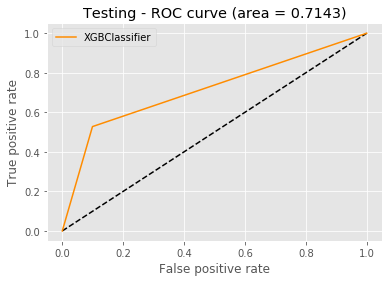

[[ 19  17]
 [ 12 109]]

accuracy................. 0.8153
precision................ 0.6129
recall................... 0.5278
auc...................... 0.7143
beta..................... 0.5429
F1 macro................. 0.7249
F1 micro................. 0.8153
F1 weighted.............. 0.8103
F1 binary................ 0.5672


In [220]:
# Testing
y_predicted = model.predict(X_test)
plot_roc_curve(y_test, y_predicted, model, 'Testing')
plot_metrics(y_test, y_predicted)

In [42]:
params = {'tree_method': 'gpu_hist', 'max_depth': 50, 'learning_rate': 0.1}
dtrain = xgb.DMatrix(X_train, y_train)
model = xgb.train(params, dtrain, evals=[(dtrain, "train")], num_boost_round= 200)

XGBoostError: [18:28:45] /home/bruno/LIBS/xgboost/src/tree/updater_gpu_hist.cu:994: Exception in gpu_hist: parallel_for failed: cudaErrorMemoryAllocation: out of memory

Stack trace:
  [bt] (0) /home/bruno/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x64) [0x7f94627ef5f4]
  [bt] (1) /home/bruno/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(xgboost::tree::GPUHistMakerSpecialised<xgboost::detail::GradientPairInternal<double> >::Update(xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*, xgboost::DMatrix*, std::vector<xgboost::RegTree*, std::allocator<xgboost::RegTree*> > const&)+0x390) [0x7f9462ce272a]
  [bt] (2) /home/bruno/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(xgboost::tree::GPUHistMaker::Update(xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*, xgboost::DMatrix*, std::vector<xgboost::RegTree*, std::allocator<xgboost::RegTree*> > const&)+0x74) [0x7f9462ce0454]
  [bt] (3) /home/bruno/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(xgboost::gbm::GBTree::BoostNewTrees(xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*, xgboost::DMatrix*, int, std::vector<std::unique_ptr<xgboost::RegTree, std::default_delete<xgboost::RegTree> >, std::allocator<std::unique_ptr<xgboost::RegTree, std::default_delete<xgboost::RegTree> > > >*)+0x100d) [0x7f94628bb87d]
  [bt] (4) /home/bruno/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(xgboost::gbm::GBTree::DoBoost(xgboost::DMatrix*, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*, xgboost::PredictionCacheEntry*)+0x124) [0x7f94628bd254]
  [bt] (5) /home/bruno/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, std::shared_ptr<xgboost::DMatrix>)+0x3d0) [0x7f94628e8910]
  [bt] (6) /home/bruno/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6d) [0x7f94627e263d]
  [bt] (7) /home/bruno/anaconda3/lib/python3.7/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x7f94c77bbec0]
  [bt] (8) /home/bruno/anaconda3/lib/python3.7/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x7f94c77bb87d]



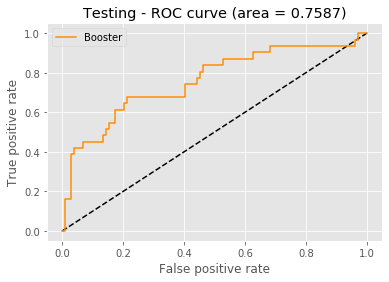

In [38]:
y_predicted = model.predict(xgb.DMatrix(X_test))
plot_roc_curve(y_test, y_predicted, model, 'Testing')
# plot_metrics(y_test, y_predicted)

In [25]:
y_predicted

array([0.13721302, 0.3265624 , 0.08068806, 0.37098897, 0.06854451,
       0.16707942, 0.13326022, 0.10933498, 0.6806473 , 0.10359901,
       0.13722181, 0.08643362, 0.88284695, 0.08606249, 0.9309567 ,
       0.2387946 , 0.70291007, 0.90398884, 0.06771424, 0.07249147,
       0.9309567 , 0.11295155, 0.06667146, 0.06688854, 0.06577271,
       0.329175  , 0.3178733 , 0.0838277 , 0.2435328 , 0.16347584,
       0.18866703, 0.16174257, 0.07883787, 0.51478255, 0.067718  ,
       0.71631396, 0.20513332, 0.0666613 , 0.30093604, 0.06741524,
       0.0673787 , 0.18367666, 0.9309567 , 0.08084479, 0.35502824,
       0.08938318, 0.06669435, 0.6436944 , 0.20085195, 0.07309997,
       0.0666613 , 0.07923573, 0.06046119, 0.06671691, 0.06098387,
       0.1834841 , 0.8198837 , 0.74382657, 0.11359274, 0.82701373,
       0.22929278, 0.92634374, 0.1030899 , 0.45838487, 0.07640556,
       0.06616935, 0.06854451, 0.20152336, 0.06577811, 0.12628254,
       0.06666669, 0.06688854, 0.0673787 , 0.21983916, 0.77518

In [27]:
len(y_test),len(y_predicted)

(135, 135)

In [29]:
np.sum(y_test)

31

In [28]:
np.around(y_predicted, 2)

array([0.14, 0.33, 0.08, 0.37, 0.07, 0.17, 0.13, 0.11, 0.68, 0.1 , 0.14,
       0.09, 0.88, 0.09, 0.93, 0.24, 0.7 , 0.9 , 0.07, 0.07, 0.93, 0.11,
       0.07, 0.07, 0.07, 0.33, 0.32, 0.08, 0.24, 0.16, 0.19, 0.16, 0.08,
       0.51, 0.07, 0.72, 0.21, 0.07, 0.3 , 0.07, 0.07, 0.18, 0.93, 0.08,
       0.36, 0.09, 0.07, 0.64, 0.2 , 0.07, 0.07, 0.08, 0.06, 0.07, 0.06,
       0.18, 0.82, 0.74, 0.11, 0.83, 0.23, 0.93, 0.1 , 0.46, 0.08, 0.07,
       0.07, 0.2 , 0.07, 0.13, 0.07, 0.07, 0.07, 0.22, 0.78, 0.06, 0.08,
       0.93, 0.07, 0.23, 0.08, 0.16, 0.07, 0.58, 0.22, 0.89, 0.07, 0.1 ,
       0.07, 0.1 , 0.07, 0.55, 0.07, 0.42, 0.44, 0.07, 0.13, 0.88, 0.32,
       0.07, 0.08, 0.08, 0.07, 0.07, 0.9 , 0.12, 0.52, 0.07, 0.09, 0.31,
       0.07, 0.07, 0.62, 0.07, 0.07, 0.62, 0.21, 0.15, 0.07, 0.08, 0.09,
       0.09, 0.32, 0.38, 0.23, 0.19, 0.16, 0.08, 0.51, 0.23, 0.07, 0.07,
       0.07, 0.45, 0.07], dtype=float32)

In [39]:
_predictions = []

for p in y_predicted:
    if p > .65:
        _predictions.append(1)
    else:
        _predictions.append(0)

In [40]:
np.sum(_predictions)

18

In [41]:
plot_metrics(y_test, _predictions)

[[13 18]
 [ 5 99]]

accuracy................. 0.8296
precision................ 0.8462
recall................... 0.9519
auc...................... 0.6856
F1 macro................. 0.7133
F1 micro................. 0.8296
F1 weighted.............. 0.8120
F1 binary................ 0.5306
